In [204]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [205]:
df_airline=pd.read_csv('Thecleverprogrammer.csv')
# df = pd.read_csv("data/Thecleverprogrammer.csv")
df_airline.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [206]:

df_airline.isnull().sum()

Date     0
Views    0
dtype: int64

In [207]:
df_airline=pd.read_csv('Thecleverprogrammer.csv',parse_dates=['Date'],index_col=['Date'])
df_airline.tail()

,Views
Date,
22/06/2022,11154
23/06/2022,10382
24/06/2022,9555
25/06/2022,8502
26/06/2022,8368


In [208]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 01/06/2021 to 26/06/2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Views   391 non-null    int64
dtypes: int64(1)
memory usage: 6.1+ KB


In [209]:
df_airline.head()

,Views
Date,
01/06/2021,7831
02/06/2021,7798
03/06/2021,7401
04/06/2021,7054
05/06/2021,7973


<Axes: xlabel='Date'>

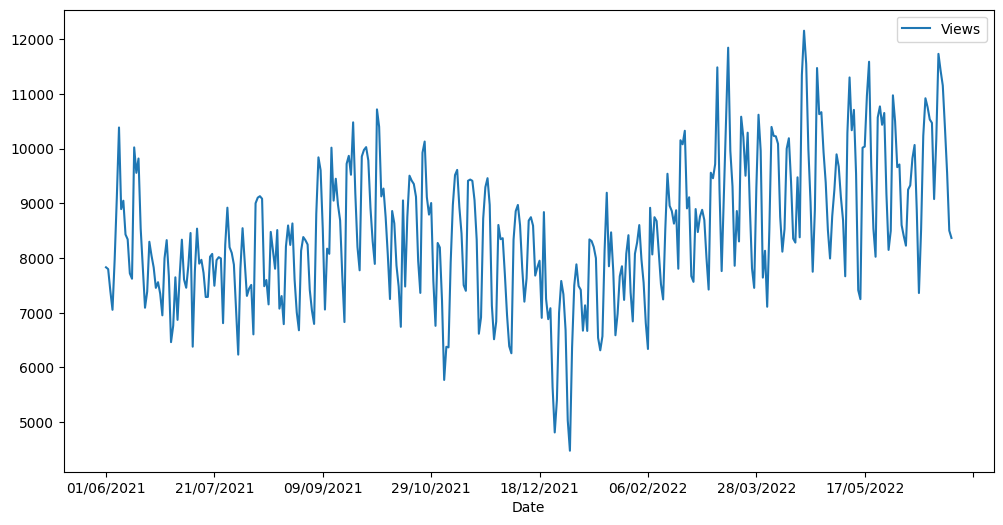

In [210]:
df_airline.plot(figsize=(12,6))

<Figure size 640x480 with 0 Axes>

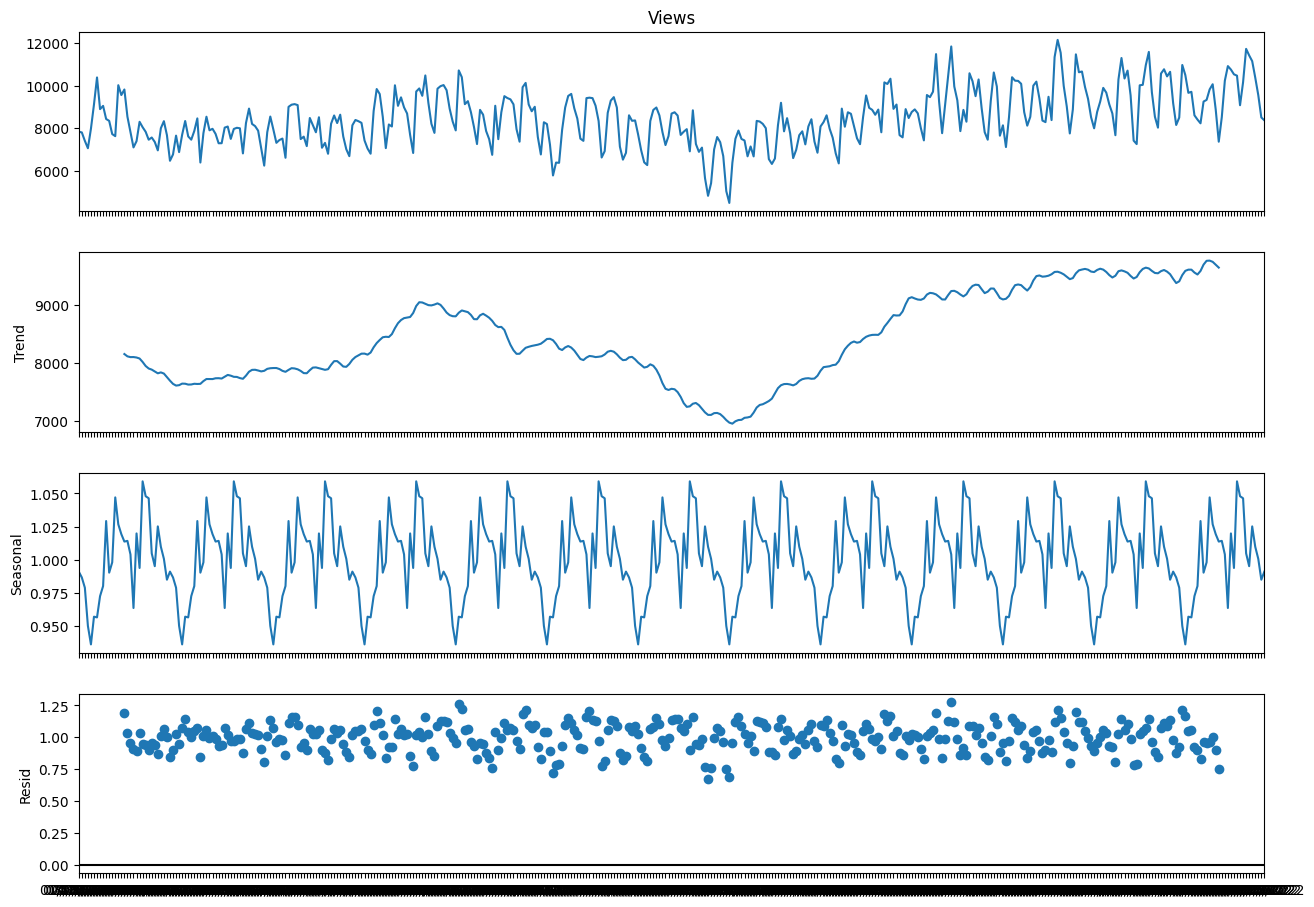

In [211]:
result = seasonal_decompose(df_airline["Views"], 
                            model='multiplicative',
                            period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [212]:
from statsmodels.tsa.stattools import adfuller

In [213]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [214]:
adf_test(df_airline['Views'])

ADF Statistics: -1.7886419347961529
p- value: 0.3861150593470247
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [215]:
## Use Techniques Differencing
df_airline['Views First Difference']=df_airline['Views']-df_airline['Views'].shift(1)

In [216]:
df_airline.head()

,Views,Views First Difference
Date,,
01/06/2021,7831,NaN
02/06/2021,7798,-33.0
03/06/2021,7401,-397.0
04/06/2021,7054,-347.0
05/06/2021,7973,919.0


In [217]:
adf_test(df_airline['Views First Difference'].dropna())

ADF Statistics: -7.594211195473269
p- value: 2.485100667139845e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [218]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

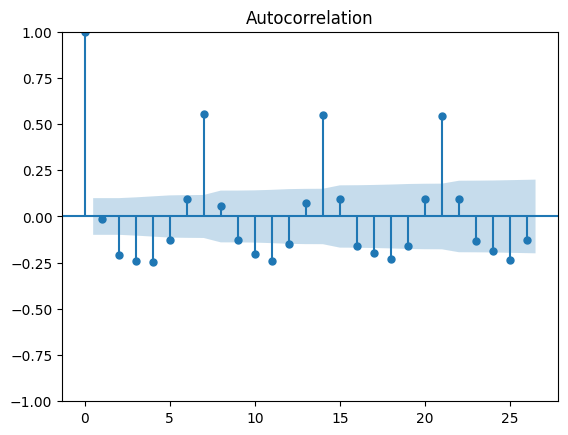

In [219]:
acf = plot_acf(df_airline["Views First Difference"].dropna())

In [220]:
# acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
# pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

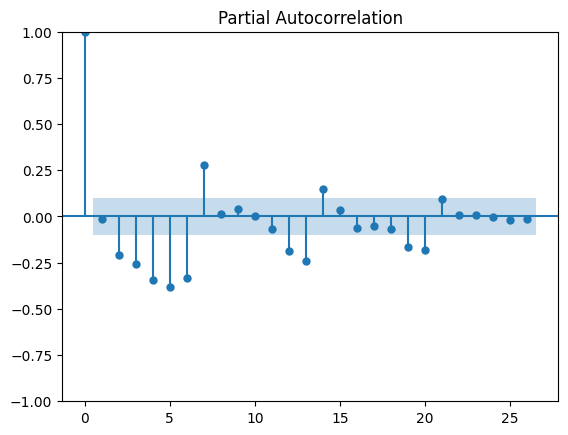

In [221]:
result = plot_pacf(df_airline["Views First Difference"].dropna())

In [222]:
### split train and test data
df_airline.head()

,Views,Views First Difference
Date,,
01/06/2021,7831,NaN
02/06/2021,7798,-33.0
03/06/2021,7401,-397.0
04/06/2021,7054,-347.0
05/06/2021,7973,919.0


In [223]:
df_airline.tail()

,Views,Views First Difference
Date,,
22/06/2022,11154,-272.0
23/06/2022,10382,-772.0
24/06/2022,9555,-827.0
25/06/2022,8502,-1053.0
26/06/2022,8368,-134.0


In [224]:
df_airline.shape

(391, 2)

In [225]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA=ARIMA(df_airline['Views'],order=(5,1,1))

c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [226]:
model_Arima_fit=model_ARIMA.fit()

In [227]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Views   No. Observations:                  391
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -3169.240
Date:                Mon, 15 Jan 2024   AIC                           6352.479
Time:                        23:07:37   BIC                           6380.242
Sample:                             0   HQIC                          6363.485
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0286      0.101     -0.283      0.777      -0.227       0.170
ar.L2         -0.3560      0.052     -6.911      0.000      -0.457      -0.255
ar.L3         -0.3185      0.053     -5.998      0.000      -0.423      -0.214
ar.L4         -0.3213      0.051     -6.286      0.000      -0.422      -0.221
ar.L5         -0.3047      0.059     -5.150      0.000      -0.421      -0.189
ma.L1         -0.3393      0.105     -3.243      0.001      -0.544      -0.134
sigma2      6.787e+05   5.43e+04     12.502      0.000    5.72e+05    7.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.00
Prob(Q):                              0.76   Prob(JB):                         0.08
Heteroskedasticity (H):               1.28   Skew:                             0.27
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
predictions = model_Arima_fit.predict(len(df_airline), len(df_airline)+20)
print(predictions[:10])

391     9776.899683
392    10620.532981
393    10727.761338
394    10339.518837
395     9631.907211
396     9055.925542
397     9156.508964
398     9676.123003
399    10154.518502
400    10324.451599
Name: predicted_mean, dtype: float64


c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

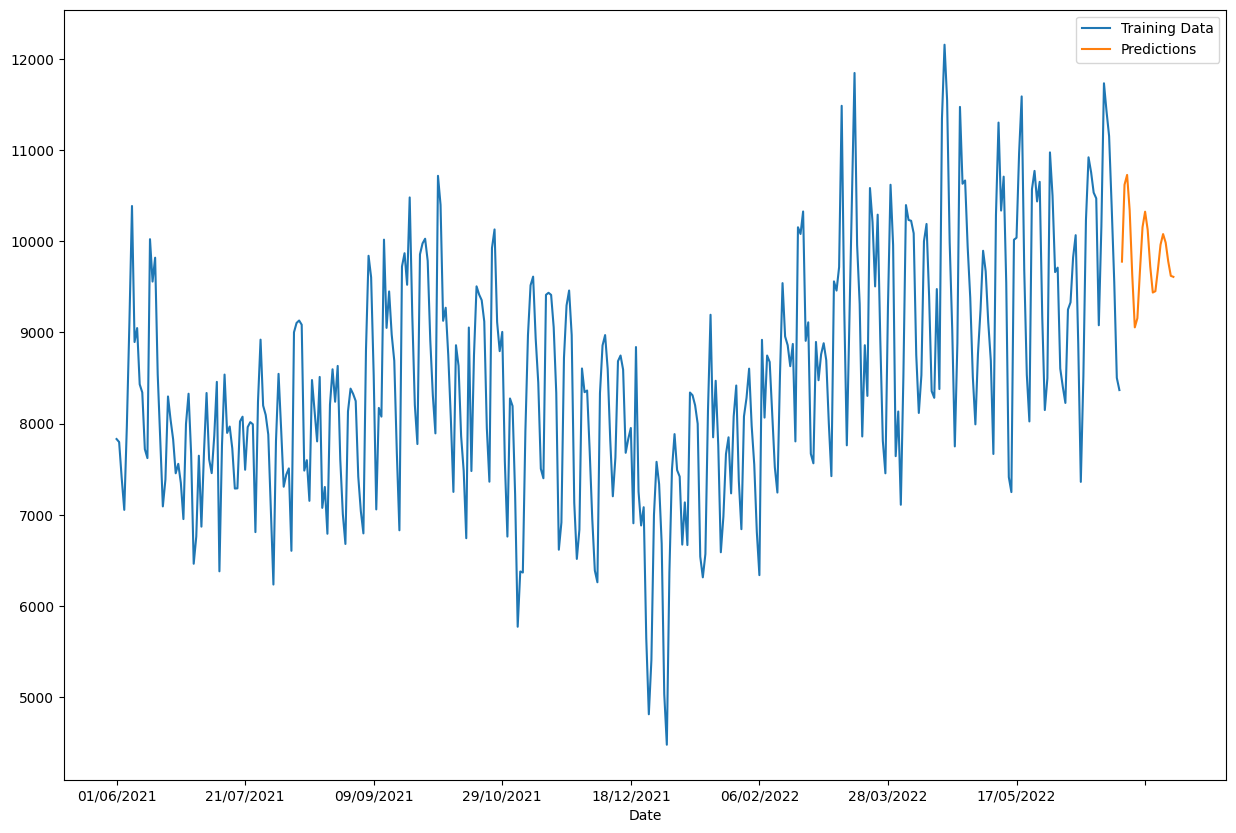

In [229]:
df_airline["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")